##  Finish the search problem

Please using the search policy to implement an agent. 
This agent receives two input, one is @param start station and the other is @param destination. 
Your agent should give the optimal route based on Beijing Subway system. 

##### Step 1: get data from web page

In [2]:
#use requests to get the html page from the url, http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json

import requests
import numpy as np
import re
r = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')
text = r.text
#print('text encoding: ', r.encoding)
#print('requests status(200/400/503)):', r.status_code)
#print('request content: ', text)

数据处理部分，可以用正则表达式，也可以直接对json文件进行解析，后者不需要正则表达式。

##### Step 2: data cleaning and preprocessing

In [3]:
def get_lines_stations_info(text):
    
    # 遍历text格式数据，组成地点数据结构
    # 所有线路信息的dict：key：线路名称；value：站点名称list
    lines_info = {}
    stations_info = {}
    for line in text.split('st'):
        if line.startswith('{'): continue
        if line.strip() == '': continue
            
        linename = re.findall('"kn":"(\w+)"',line)[0]
        line_station = re.findall('"n":"(\w+)"',line)
        lines_info[linename] = line_station
    
    # 所有站点信息的dict：key：站点名称；value：站点坐标(x,y)
        for sta in line.split('rs'):
        
            if sta.startswith('\":['): continue
              
            stationname = re.findall('"n":"(\w+)"',sta)[0]
            cord = re.findall('"sl":"(\d+.\d+),(\d+.\d+)"',sta)[0]
            cord = tuple(map(float,cord))
        
            stations_info[stationname] = cord
            
    return lines_info, stations_info


        
    
    #for i in range(len(lines_list)):
        # 你可能需要思考的几个问题，获取「地铁线路名称，站点信息list，站名，坐标(x,y)，数据加入站点的信息dict，将数据加入地铁线路dict」
#        pass

lines_info, stations_info = get_lines_stations_info(r.text)


In [18]:
#用json解析
import json
j_r = json.loads(text)
#print(type(j_r))
#list(j_r)
j_r

{'s': '北京市地铁',
 'i': '1100',
 'l': [{'st': [{'rs': '270 684|270 684',
     'udpx': '270 687;270 681',
     'su': '1',
     'udsu': '1;1',
     'n': '金安桥',
     'sid': '110100023339035',
     'p': '270 684',
     'r': '900000069871|110100023339',
     'udsi': '900000069872015;900000069871002',
     't': '1',
     'si': '110100023339035',
     'sl': '116.163167,39.923620',
     'udli': '900000069872;900000069871',
     'poiid': 'BV10813545',
     'lg': '0',
     'sp': 'jin an qiao'},
    {'rs': '226 684',
     'udpx': '226 681;226 687',
     'su': '1',
     'udsu': '1;1',
     'n': '四道桥',
     'sid': '900000069871003',
     'p': '226 684',
     'r': '900000069871',
     'udsi': '900000069871003;900000069872014',
     't': '0',
     'si': '900000069871003',
     'sl': '116.134010,39.916030',
     'udli': '900000069871;900000069872',
     'poiid': 'BV10813547',
     'lg': '0',
     'sp': 'si dao qiao'},
    {'rs': '181 684',
     'udpx': '180 681;180 687',
     'su': '1',
     'udsu': '1;1

In [17]:
import pandas as pd
bj_s = pd.DataFrame(j_r)
bj_s

,s,i,l,o
0,北京市地铁,1100,"{'st': [{'rs': '270 684|270 684', 'udpx': '270...","1015,660"
1,北京市地铁,1100,"{'st': [{'rs': '312 684', 'udpx': '310 685;314...","1015,660"
2,北京市地铁,1100,"{'st': [{'rs': '905 555', 'udpx': '905 558,905...","1015,660"
3,北京市地铁,1100,"{'st': [{'rs': '878 1353', 'udpx': '876 1353;8...","1015,660"
4,北京市地铁,1100,"{'st': [{'rs': '1116 935|1116 935|1116 935', '...","1015,660"
5,北京市地铁,1100,"{'st': [{'rs': '2000 772', 'udpx': '2000 769;2...","1015,660"
6,北京市地铁,1100,"{'st': [{'rs': '1820 1000|1820 1000', 'udpx': ...","1015,660"
7,北京市地铁,1100,"{'st': [{'rs': '1029 663', 'udpx': '1032 662;1...","1015,660"
8,北京市地铁,1100,"{'st': [{'rs': '1027 800|1027 800', 'udpx': '1...","1015,660"
9,北京市地铁,1100,"{'st': [{'rs': '620 977|620 977', 'udpx': '623...","1015,660"


In [23]:
dict_l = bj_s.loc[3,'l']
dict_l

{'st': [{'rs': '878 1353',
   'udpx': '876 1353;881 1353',
   'su': '1',
   'udsu': '1;1',
   'n': '天宫院',
   'sid': '110100023076036',
   'p': '878 1353',
   'r': '110100023076',
   'udsi': '110100023076036;110100023077026',
   't': '0',
   'si': '110100023076036',
   'sl': '116.319932,39.670342',
   'udli': '110100023076;110100023077',
   'poiid': 'BV10003869',
   'lg': '2',
   'sp': 'tian gong yuan'},
  {'rs': '878 1319',
   'udpx': '881 1319;876 1319',
   'su': '1',
   'udsu': '1;1',
   'n': '生物医药基地',
   'sid': '110100023076035',
   'p': '878 1319',
   'r': '110100023076',
   'udsi': '110100023077027;110100023076035',
   't': '0',
   'si': '110100023076035',
   'sl': '116.321662,39.686510',
   'udli': '110100023077;110100023076',
   'poiid': 'BV10013422',
   'lg': '2',
   'sp': 'sheng wu yi yao ji di'},
  {'rs': '878 1283',
   'udpx': '881 1283;875 1283',
   'su': '1',
   'udsu': '1;1',
   'n': '义和庄',
   'sid': '110100023076034',
   'p': '878 1283',
   'r': '110100023076',
   'udsi'

邻接表的概念：做作业的时候根本没搞懂。看了参考答案之后才知道，就是把与该站点直接相邻的其他站点都当成该站点的values

In [4]:
print(lines_info)

{'S1线': ['金安桥', '四道桥', '桥户营', '上岸', '栗园庄', '小园', '石厂'], '地铁1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], '地铁2号线': ['积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄', '西直门'], '地铁4号线大兴线': ['天宫院', '生物医药基地', '义和庄', '黄村火车站', '黄村西大街', '清源路', '枣园', '高米店南', '高米店北', '西红门', '新宫', '公益西桥', '角门西', '马家堡', '北京南站', '陶然亭', '菜市口', '宣武门', '西单', '灵境胡同', '西四', '平安里', '新街口', '西直门', '动物园', '国家图书馆', '魏公村', '人民大学', '海淀黄庄', '中关村', '北京大学东门', '圆明园', '西苑', '北宫门', '安河桥北'], '地铁5号线': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'], '地铁6号线': ['潞城', '东夏园', '郝家府', '北运河东', '北运河西', '通州北关', '物资学院路', '草房', '常营', '黄渠', '褡裢坡', '青年路', '十里堡', '金台路', '呼家楼', '东大桥', '朝阳门', '东四', '南锣鼓巷', '北海北', '平安里', '车公庄', '车公庄西',

In [5]:
#generate graph
# 根据线路信息，建立站点邻接表dict
def get_neighbor_info(lines_info):
    #建立以站点为key的空字典
    neighbor_info = {}
    for i in list(stations_info.keys()):
        neighbor_info[i] = []
    #建立储存顶点key信息的nodes列表，已成为顶点key的站点会放入nodes中
    nodes = set()
    
    # 把str2加入str1站点的邻接表中
    def add_neighbor_dict(nodes, str1, str2):
        nodes.add(str1)
        neighbor_info[str2].append(str1)
        neighbor_info[str1].append(str2)
            
    #按顺序读取每条线路的站点list 
    for l in list(lines_info.keys()):
        #按顺序读取list里的站点
        for s in range(len(lines_info[l])-1):
            str1 = lines_info[l][s]            
            add_neighbor_dict(nodes,lines_info[l][s],lines_info[l][s+1])
           
            
        
    return neighbor_info
        
neighbor_info = get_neighbor_info(lines_info)
#lines_info
neighbor_info

{'金安桥': ['四道桥', '杨庄'],
 '四道桥': ['金安桥', '桥户营'],
 '桥户营': ['四道桥', '上岸'],
 '上岸': ['桥户营', '栗园庄'],
 '栗园庄': ['上岸', '小园'],
 '小园': ['栗园庄', '石厂'],
 '石厂': ['小园'],
 '苹果园': ['古城'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '宣武门', '灵境胡同'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '崇文门', '灯市口'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '国贸': ['永安里', '大望路', '金台夕照', '双井'],
 '大望路': ['国贸', '四惠', '金台路', '九龙山'],
 '四惠': ['大望路', '四惠东', '四惠东'],
 '四惠东': ['四惠', '四惠', '高碑店'],
 '积水潭': ['鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '什刹海', '安德里北街'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'],
 '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥'],
 '东四十条'

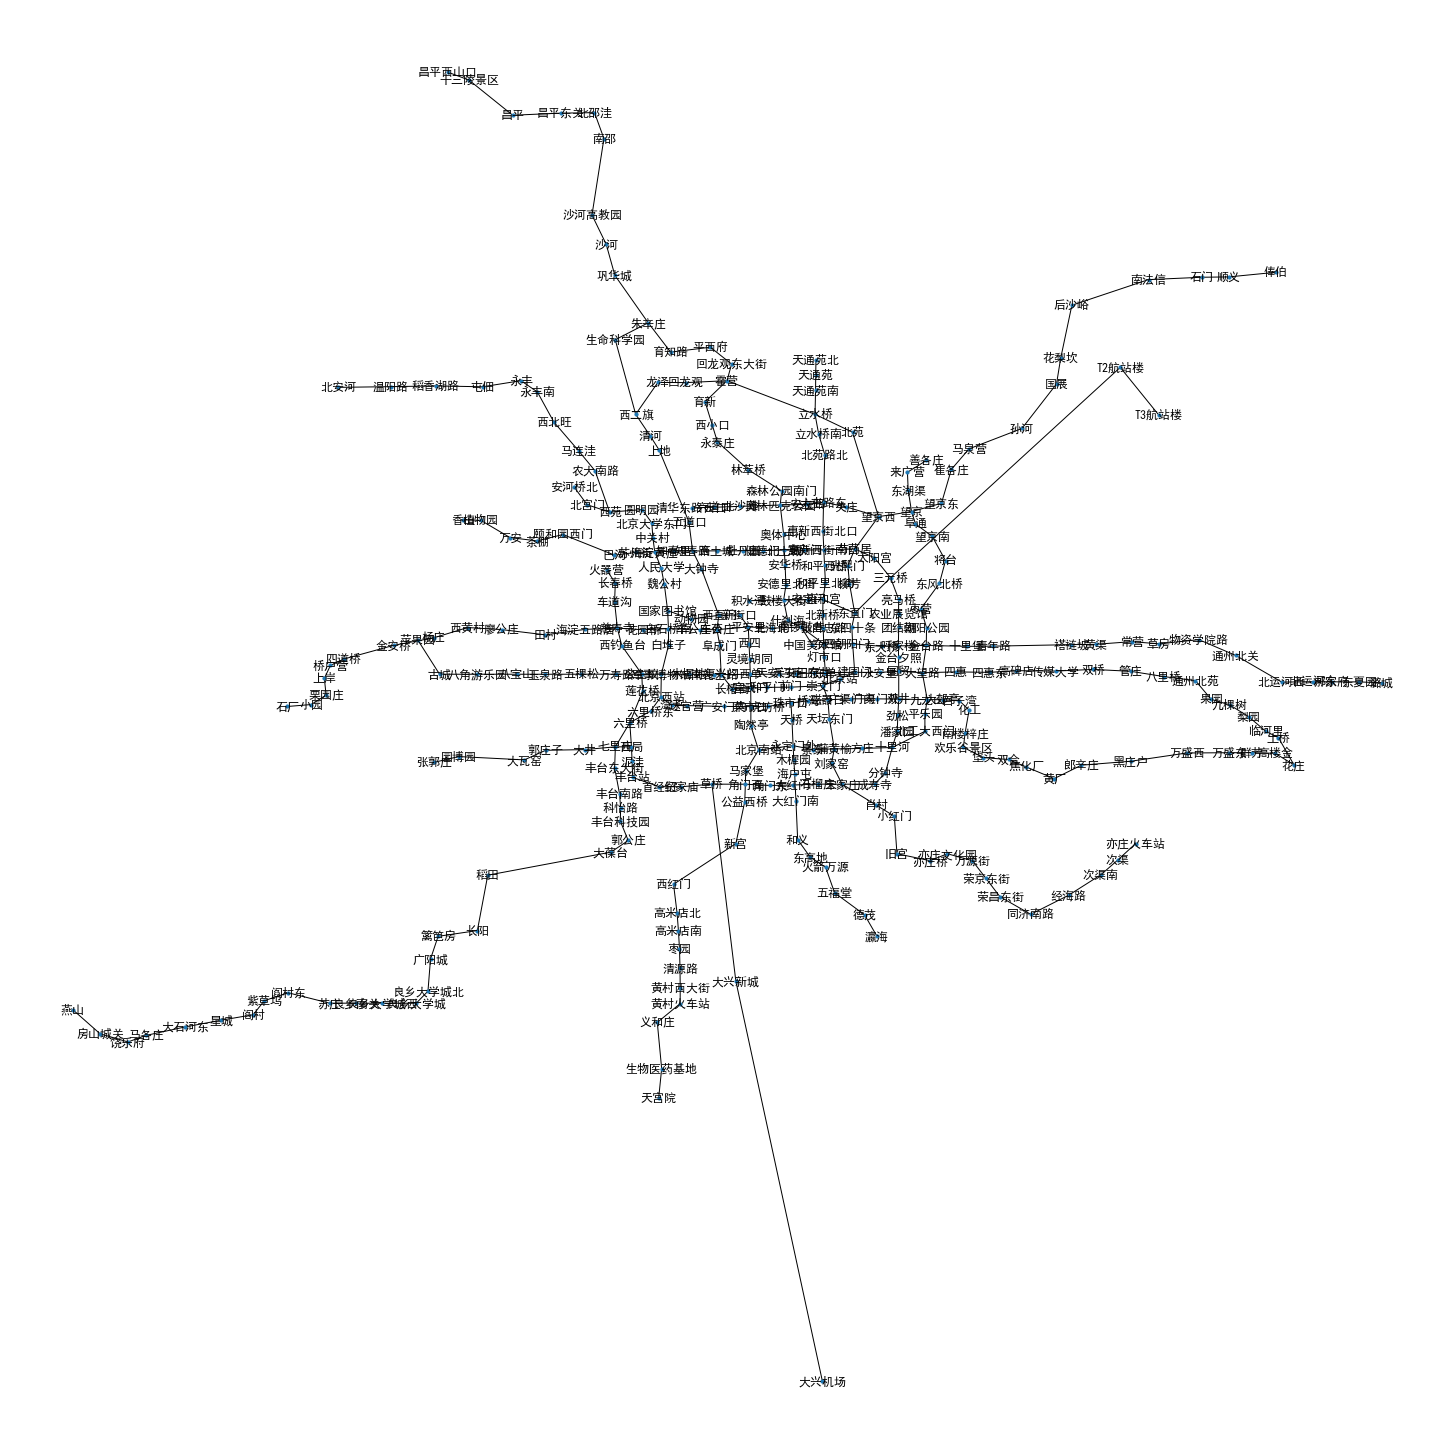

In [11]:
# 画地铁图
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

# 如果汉字无法显示，请参照
matplotlib.rcParams['font.sans-serif'] = ['SimHei'] 

# matplotlib.rcParams['font.family']='sans-serif'
plt.figure(figsize = (20,20))
neighbor_graph = nx.Graph(neighbor_info)
nx.draw(neighbor_graph, stations_info, with_labels = True, node_size =10)

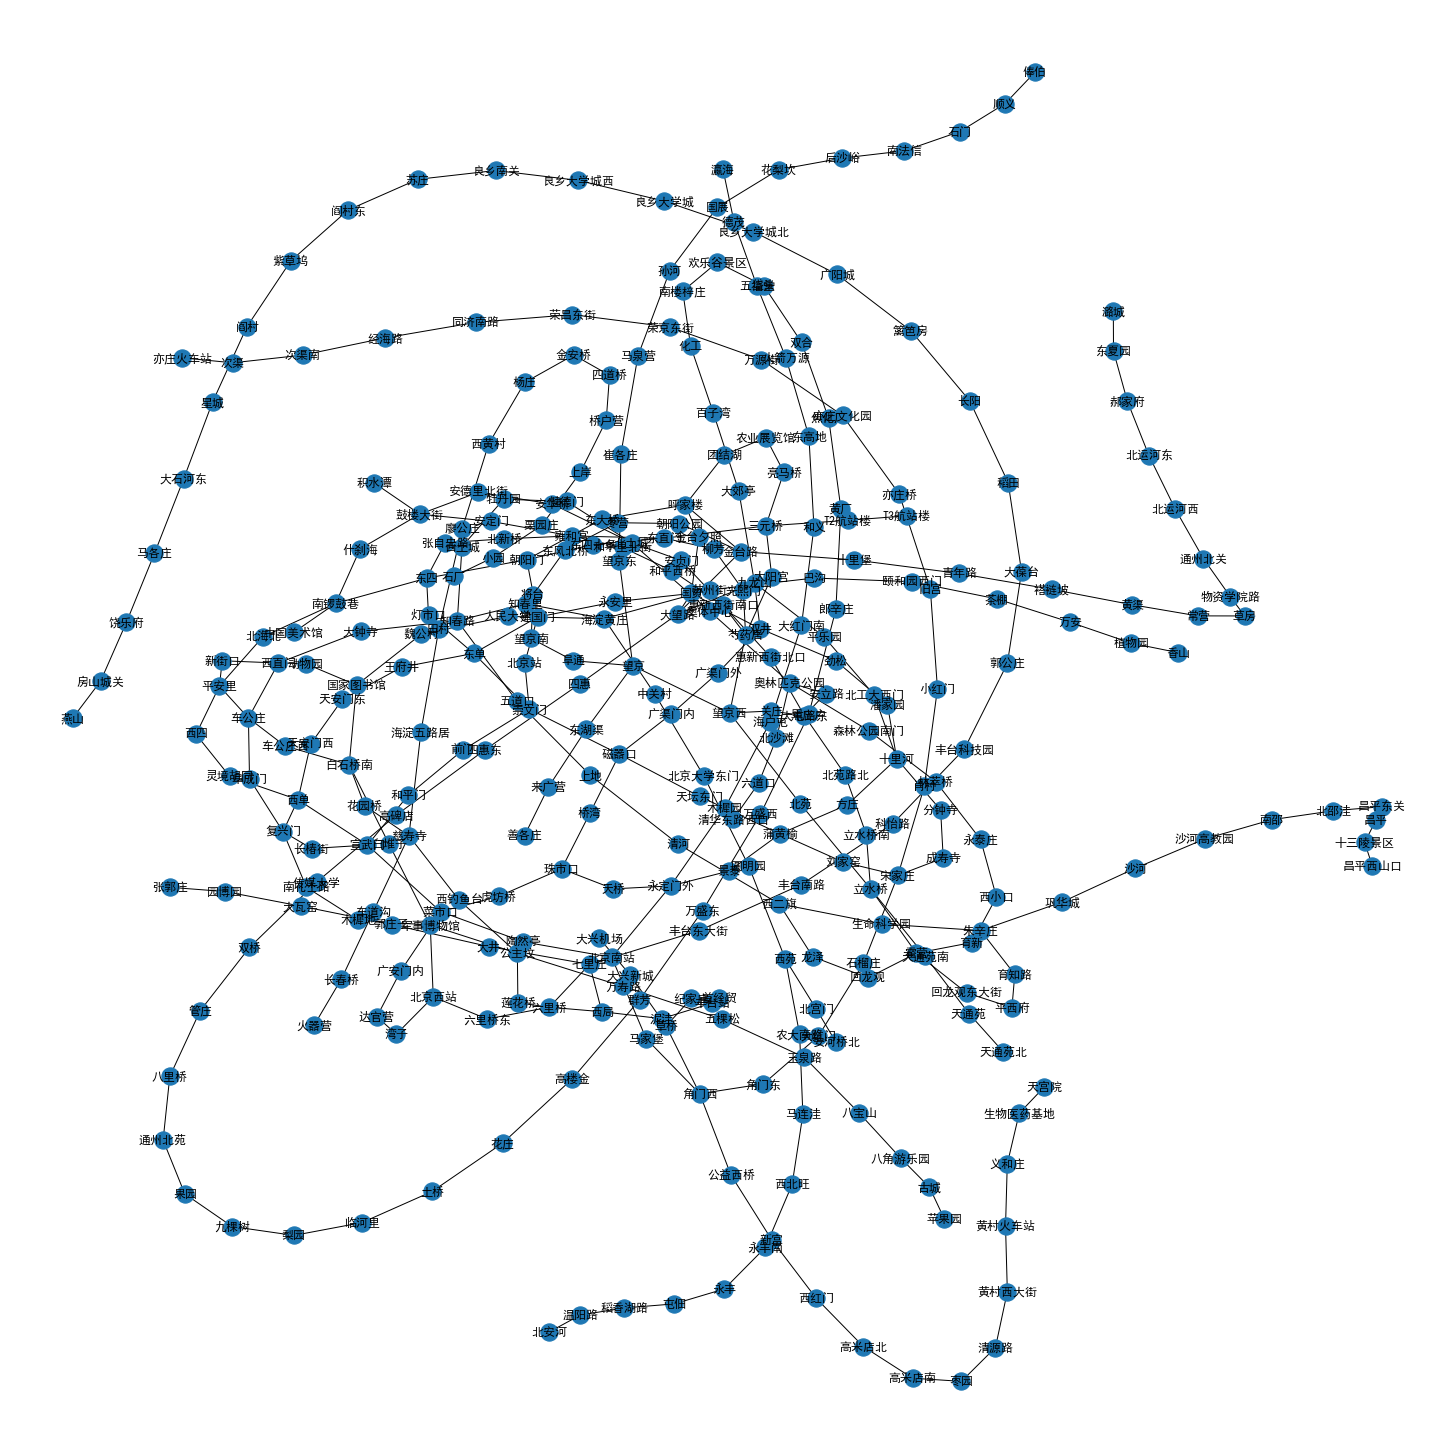

In [10]:
#用networkx创建graph
plt.figure(figsize=(20,20))
stations_graph = nx.Graph()
stations_graph.add_nodes_from(list(stations_info.keys()))      
stationsss = nx.Graph(stations_graph)
nx.draw(neighbor_graph, with_labels = True)

##### Step 3: build the search agent

递归例子

In [14]:
#非递归
def jc_1(n):
    res = 1
#非递归计算 5*4*3*2*1 是把每一步的结果算出来再进行下一步操作，先算5*4=20，再用20*3.....
    for i in range(1,n+1):
        res *= i    
    return res

#递归
def jc_2(n):
    if n == 1: return n
#递归是直接计算5*4*3*2*1，并没有算出每一步的值：5*（5-1）*[（5-1）-1]*[[（5-1）-1]-1]*...
    return n*jc_2(n-1)    

print('jc_1(5):{}, jc_2(5):{}'.format(jc_1(5),jc_2(5)))

jc_1(5):120, jc_2(5):120


In [8]:
# 你可以用递归查找所有路径
def get_path_DFS_ALL(lines_info, neighbor_info, from_station, to_station):
    need_to_check = [[from_station]]
    visited = set()
    
    while need_to_check:      
        stationlist = need_to_check.pop(-1)
        #print(stationlist)
        station = stationlist[-1]  
        #print(station)
                                    
        #判断该站是否已经走过
        if station in visited: continue        
            
        new_unknown_stations = neighbor_info[station]
        print(new_unknown_stations)
        
        
        for stop in new_unknown_stations:
            print(stop)
            if stop in stationlist: continue
            
            station_result = stationlist + [stop]
            
            need_to_check = [station_result] + stationlist
      
            if station == to_station:
                return station_result
           
        visited.add(station)

        
    
        

def get_next_station_DFS_ALL(node, neighbor_info, to_station):
    pass


get_path_DFS_ALL(lines_info, neighbor_info, from_station = '石厂', to_station = '海淀黄庄')

['小园']
小园


KeyError: '厂'